# Sharp Ratio & Frontier

In [99]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Portfolio Atual

In [100]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'PMAM3.SA', 'FLRY3.SA', 'PSSA3.SA', 'TIET4.SA']

itau = web.DataReader(tickers[0], ds_yahoo, start, end)
abev = web.DataReader(tickers[1], ds_yahoo, start, end)
usim = web.DataReader(tickers[2], ds_yahoo, start, end)
pmam = web.DataReader(tickers[3], ds_yahoo, start, end)
flry = web.DataReader(tickers[4], ds_yahoo, start, end)
pssa = web.DataReader(tickers[5], ds_yahoo, start, end)
tiet = web.DataReader(tickers[6], ds_yahoo, start, end)

In [101]:
# PSSA = 27.2%
# ABEV = 9.5%
# USIM = 12%
# PMAM = 4%
# ITUB = 28.5%
# TIET = 12.1%

## Normalizando o retorno diário de cada ativo do portfólio

In [102]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [103]:
# ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'PMAM3.SA', 'FLRY3.SA', 'PSSA3.SA', 'TIET4.SA']
# [0.26107593, 0.04831414, 0.02464465, 0.03614935, 0.03725014, 0.2962411 , 0.29632469]
# [0.23831868, 0.03159086, 0.16443563, 0.05013128, 0.03560001, 0.38882187, 0.09110165]

In [135]:
pesos_arr = [0.26107593, 0.04831414, 0.02464465, 0.03614935, 0.03725014, 0.2962411 , 0.29632469]
for acao_df, alocacao in zip((itau, abev, usim, pmam, flry, pssa, tiet), pesos_arr):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [129]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet):
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [130]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'],
                  pmam['Posicao'], flry['Posicao'], pssa['Posicao'], tiet['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [131]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET']
portfolio_acoes.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET']

## Calculando o Total da carteira

In [132]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [133]:
portfolio_posicao.head()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET,Total
Date,,,,,,,,
2018-06-22,2610.759300,483.141400,246.446500,361.493500,372.501400,2962.411000,2963.246900,10000.000000
2018-06-25,2616.065235,484.737662,246.102312,347.033754,376.954199,3021.964397,2993.954358,10086.811917
2018-06-26,2607.434649,481.279051,244.725512,338.357906,400.600223,3078.464252,2993.954358,10144.815951
2018-06-27,2560.319742,477.554404,246.102312,332.574007,393.537117,3018.147074,2917.185911,9945.420568
2018-06-28,2631.325351,479.150666,255.739864,323.898192,402.289238,3044.384533,2978.600827,10115.388672


In [134]:
portfolio_posicao.tail()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET,Total
Date,,,,,,,,
2019-06-14,3488.201423,478.958481,302.765962,358.431432,336.685128,4382.153335,3840.896819,13188.092580
2019-06-17,3484.096355,483.302771,300.668295,354.348686,331.691243,4436.826690,3907.405793,13298.339833
2019-06-18,3574.405882,490.090732,306.961329,348.734906,333.302182,4455.050931,3874.151306,13382.697269
2019-06-19,3630.849190,494.163550,302.765962,356.049838,335.074188,4460.849596,3874.151306,13453.903630
2019-06-21,3694.476170,500.951510,303.814795,359.792348,338.296068,4485.701379,3874.151306,13557.183577


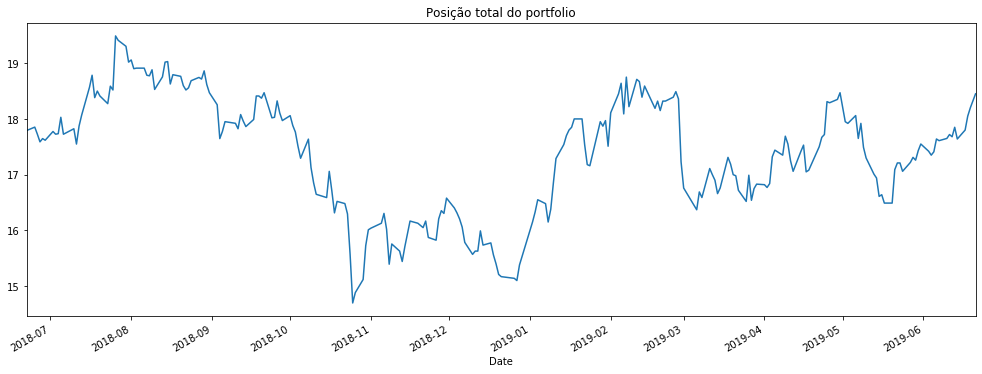

In [111]:
abev['Adj Close'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

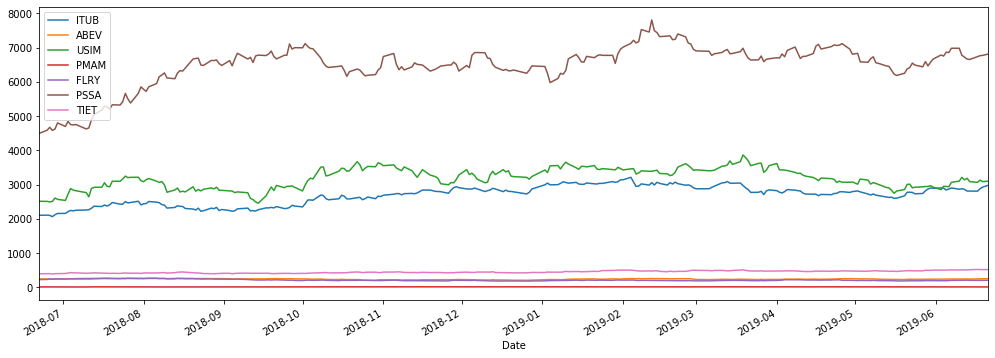

In [112]:
portfolio_posicao.drop('Total', axis=1).plot(figsize=(17,6));

## Retorno diário do Total da carteira

In [113]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [114]:
portfolio_posicao.head()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET,Total,Retorno Diario
Date,,,,,,,,,
2018-06-22,2104.238800,246.225400,2512.913700,14.047700,228.738200,4496.165800,397.670500,10000.000100,NaN
2018-06-25,2108.515316,247.038910,2509.404161,13.485792,231.472485,4586.552295,401.791470,10098.260429,0.009826
2018-06-26,2101.559174,245.276283,2495.365494,13.148647,245.992562,4672.304311,401.791470,10175.437941,0.007643
2018-06-27,2063.585157,243.378075,2509.404161,12.923883,241.655392,4580.758597,391.489072,10043.194338,-0.012996
2018-06-28,2120.814776,244.191585,2607.674318,12.586740,247.029719,4620.580203,399.731011,10252.608353,0.020851


In [115]:
portfolio_posicao.tail()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET,Total,Retorno Diario
Date,,,,,,,,,
2019-06-14,2811.445994,244.093641,3087.180113,13.928708,206.744861,6650.963677,515.451938,13529.808932,-0.008085
2019-06-17,2808.137362,246.307640,3065.791064,13.770051,203.678316,6733.943542,524.377505,13596.005480,0.004893
2019-06-18,2880.925692,249.767018,3129.958550,13.551899,204.667529,6761.603178,519.914722,13760.388587,0.012091
2019-06-19,2926.418281,251.842665,3087.180113,13.836158,205.755647,6770.404036,519.914722,13775.351622,0.001087
2019-06-21,2977.700818,255.302042,3097.874637,13.981593,207.734075,6808.122549,519.914722,13880.630435,0.007643


In [116]:
round(portfolio_posicao['Retorno Diario'].mean() * 100, 3)

0.145

In [117]:
portfolio_posicao['Retorno Diario'].std()

0.014652967684820618

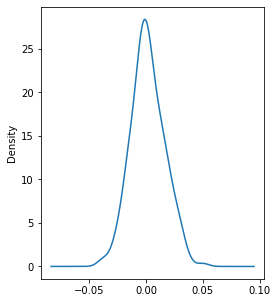

In [118]:
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

In [119]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
retorno_total_acumulado

38.80630296213856

In [120]:
sharpe_ratio = (portfolio_posicao['Retorno Diario'].mean()) / portfolio_posicao['Retorno Diario'].std()
sharpe_ratio

0.0990523968649568

In [121]:
sharpe_ratio_ano = (245 ** 0.5) * sharpe_ratio
sharpe_ratio_ano

1.5504152490703134

## Retorno diário logarítimico

In [122]:
retorno_log = np.log( portfolio_acoes / portfolio_acoes.shift(1) )

In [123]:
retorno_log.head()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET
Date,,,,,,,
2018-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-25,0.002030,0.003298,-0.001398,-0.040822,0.011883,0.019904,0.010309
2018-06-26,-0.003305,-0.007161,-0.005610,-0.025318,0.060840,0.018524,0.000000
2018-06-27,-0.018235,-0.007769,0.005610,-0.017242,-0.017789,-0.019788,-0.025976
2018-06-28,0.027356,0.003337,0.038413,-0.026433,0.021996,0.008656,0.020834


In [124]:
retorno_log.tail()

,ITUB,ABEV,USIM,PMAM,FLRY,PSSA,TIET
Date,,,,,,,
2019-06-14,0.000294,-0.011835,-0.030702,-0.006151,-0.018019,-0.001889,0.008696
2019-06-17,-0.001178,0.009029,-0.006952,-0.011456,-0.014944,0.012399,0.017168
2019-06-18,0.025590,0.013947,0.020714,-0.015969,0.004845,0.004099,-0.008547
2019-06-19,0.015668,0.008276,-0.013762,0.020759,0.005302,0.001301,0.000000
2019-06-21,0.017372,0.013643,0.003458,0.010456,0.009569,0.005556,0.000000


In [125]:
retorno_log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2018-06-22 to 2019-06-21
Data columns (total 7 columns):
ITUB    244 non-null float64
ABEV    244 non-null float64
USIM    244 non-null float64
PMAM    244 non-null float64
FLRY    244 non-null float64
PSSA    244 non-null float64
TIET    244 non-null float64
dtypes: float64(7)
memory usage: 25.3 KB


## Gerando um único portfólio com pesos aleatórios

In [126]:
print(portfolio_acoes.columns)

# Gerando pesos aleatórios
print("Pesos Aleatórios")
pesos = np.array(np.random.random(7))
print(pesos)

print("Rebalancear os pesos")
pesos = pesos / np.sum(pesos)
print(pesos)

# Retorno esperado
print("Retorno esperado")
ret_esp = np.sum( (retorno_log.mean() * pesos) * 245 )
print(ret_esp)

# Volatilidade esperada
print("Volatilidade esperada")
vol_esp = np.sqrt( np.dot( pesos.T, np.dot( retorno_log.cov() * 245, pesos )))
print(vol_esp)

# Taxa de Sharpe
print("Sharpe Ratio")
sharpe = ret_esp / vol_esp
print(sharpe)


Index(['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET'], dtype='object')
Pesos Aleatórios
[0.33824905 0.16844131 0.11062981 0.9154562  0.2178225  0.58858816
 0.64799819]
Rebalancear os pesos
[0.11323337 0.05638797 0.0370348  0.30646114 0.07291898 0.19703772
 0.21692602]
Retorno esperado
0.18127112450491328
Volatilidade esperada
0.19576069978217714
Sharpe Ratio
0.9259832270042638


## Gerando milhares de portfólios

In [127]:
num_portfolios = 5
pesos_arr = np.zeros((num_portfolios, len(portfolio_acoes.columns)))
ret_esp_arr = np.zeros(num_portfolios)
vol_esp_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    # Gerando pesos aleatórios
    pesos = np.array(np.random.random(7))
    pesos = pesos / np.sum(pesos)
    pesos_arr[ind,:] = pesos

    # Retorno esperado
    ret_esp_arr[ind] = np.sum( (retorno_log.mean() * weights) * 245 )

    # Volatilidade esperada
    vol_esp_arr[ind] = np.sqrt( np.dot( pesos.T, np.dot( retorno_log.cov() * 245, pesos ) ) )

    # Taxa de Sharpe
    sharpe_arr[ind] = ret_esp_arr[ind] / vol_esp_arr[ind]
    

NameError: name 'weights' is not defined

In [ ]:
sharpe_arr.max()

In [ ]:
sharpe_arr.argmax()

In [ ]:
pesos_arr[sharpe_arr.argmax(),:]